### README
This script investigates the behaviour of internal standards. <br>
It plots the value of internal standards before and after quantile normalization. <br>
It also computes the distribution of variability before and after quantile normalization for internal standards and all other metabolites. <br>

In [1]:
import pandas, numpy, seaborn

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

# 0. user-defined variables

In [2]:
internal_standards_file = '/home/adrian/gd15/hi/research/huvec/data/untargetted/internal_standards/internal_standards.csv'
data_file = '/home/adrian/gd15/hi/research/huvec/data/untargetted/ROSA_ACID_NEG_UT_NOMISNORM_AllBatches_untransformed.xlsx'

In [3]:
patients = [1, 2, 3, 4, 5]
time_points = [4, 24]
treatments = [1, 10, 100]

# 1. read data

## 1.1. internal standards

In [4]:
info = pandas.read_csv(internal_standards_file, sep=',')
standards = info[info['IS'] == 1]

print(standards.shape)
standards.head()

(8, 2)


,Names,IS
29,92.06314,1
84,121.04228,1
86,124.00480,1
148,149.12122,1
151,151.07533,1


## 1.2. read intensities

In [5]:
original_data = pandas.read_excel(data_file)
original_data.head(20)

,Unnamed: 0,Number,Treatment,Batch,Cell number,TIME,X59.01097,X61.017890000000001,X67.016220000000004,X74.021450000000002,...,X970.31845999999996,X970.33735000000001,X972.28162999999995,X986.81443999999999,X996.20851000000005,X996.78913999999997,X996.80704000000003,X996.82538,X996.84303,X996.86003000000005
0,EC_Rosa_1_659,4,EGM,1,480000.0,0,287.490913,468.605181,189.373225,576.720535,...,465.887121,538.617987,445.230813,507.349690,316.742342,1704.549078,2324.193317,3058.642052,2278.023742,2335.314302
1,EC_Rosa_1_666,5,EGM,1,480000.0,0,180.314261,538.342307,130.499826,603.217924,...,715.677228,713.253520,518.775906,755.134538,123.522480,2331.474888,3382.452083,2496.359276,3421.428464,3531.897024
2,EC_Rosa_1_668,3,EGM,1,480000.0,0,284.725250,346.699905,391.221386,430.336737,...,430.145981,471.505944,371.179769,556.979273,103.571678,1891.004688,1694.637198,1856.663944,1758.452722,1738.477130
3,EC_Rosa_1_695,31,EGM,2,NaN,0,215.383340,632.252573,521.709396,334.036661,...,632.334182,668.358819,546.989703,731.548349,229.357094,1411.265683,1856.889097,2134.864349,2284.850823,2055.847626
4,EC_Rosa_1_711,32,EGM,2,NaN,0,308.400509,461.052002,269.282993,759.247147,...,327.326707,452.810036,324.323485,546.560671,12.509056,1898.663392,2342.170593,2813.164141,2517.026143,2493.479576
5,EC_Rosa_1_715,30,EGM,2,NaN,0,253.384215,566.797529,127.261980,555.836454,...,647.108441,734.358112,638.694505,773.894188,13.594109,1401.881982,2074.314206,2503.599667,2147.152288,2051.956174
6,EC_Rosa_1_747,58,EGM,3,NaN,0,190.456279,682.061729,185.131723,631.450754,...,1317.180799,1352.581918,1124.766236,873.671179,627.759085,2869.515147,3942.319687,4092.519390,4085.925387,3488.224085
7,EC_Rosa_1_769,59,EGM,3,NaN,0,231.760677,532.578473,477.142505,741.576982,...,821.800615,827.529715,609.771755,1022.688128,264.129823,1721.744649,2491.291092,3278.817317,1720.139459,3006.931427
8,EC_Rosa_1_770,57,EGM,3,NaN,0,208.437313,578.753825,70.294389,631.157343,...,719.630859,799.341972,598.002398,671.208816,299.118662,2890.299121,3381.234241,3578.538115,3396.685744,3357.708795
9,EC_Rosa_1_787,85,EGM,4,270000.0,0,167.711175,492.864670,126.169397,629.946102,...,728.483753,779.709494,623.296887,630.341647,549.192116,2440.418898,2985.704077,3329.990475,3313.101362,2913.329347


In [6]:
######
for st in standards['Names']:
    print(st)
    for name in original_data.columns:
        if "X" in name:
            mz = float(name[1:])
            diff = numpy.abs(mz - st)
            if diff < 1e0:
                print('\t', name, diff)

92.06314
	 X92.032160000000005 0.030979999999999563
	 X92.031949999999995 0.031190000000009377
	 X92.925600000000003 0.8624599999999987
	 X93.043189999999996 0.9800499999999914
121.04228
	 X121.04165 0.0006300000000010186
124.0048
	 X123.04617 0.9586299999999994
	 X124.9894 0.9846000000000004
149.12122
	 X148.95083 0.1703899999999976
	 X149.02237 0.09884999999999877
	 X149.05306999999999 0.06815000000000282
	 X149.09623999999999 0.024979999999999336
151.07533
	 X150.12427 0.9510600000000125
	 X150.88471000000001 0.19061999999999557
	 X151.11041 0.03507999999999356
166.08233
	 X166.01667 0.06566000000000827
	 X166.08246 0.00012999999998442036
	 X167.04226 0.9599299999999857
	 X167.06326999999999 0.9809399999999755
185.07431
	 X185.01043000000001 0.06387999999998328
	 X185.07420999999999 0.00010000000000331966
	 X186.04378 0.9694700000000012
	 X186.04378_2 0.9694719999999961
361.07325
	 X360.08832000000001 0.984929999999963
	 X361.07267999999999 0.0005699999999819738
	 X361.2054400000000

In [7]:
detected_standards = []
for st in standards['Names']:
    print(st)
    for name in original_data.columns:
        if "X" in name:
            mz = float(name[1:])
            diff = numpy.abs(mz - st)
            if diff < 1e-2:
                print('\t', name, diff)
                detected_standards.append(name)

92.06314
121.04228
	 X121.04165 0.0006300000000010186
124.0048
149.12122
151.07533
166.08233
	 X166.08246 0.00012999999998442036
185.07431
	 X185.07420999999999 0.00010000000000331966
361.07325
	 X361.07267999999999 0.0005699999999819738


In [8]:
isdf = original_data.loc[:, detected_standards]
isdf.head()

,X121.04165,X166.08246,X185.07420999999999,X361.07267999999999
0,2407.680936,79.998378,436.137685,1152.016741
1,1942.125862,89.456136,675.074144,1510.888804
2,2133.625445,70.922421,457.656929,976.722327
3,1657.679295,84.939860,401.651186,566.000140
4,2186.719860,97.662089,559.529317,711.828222


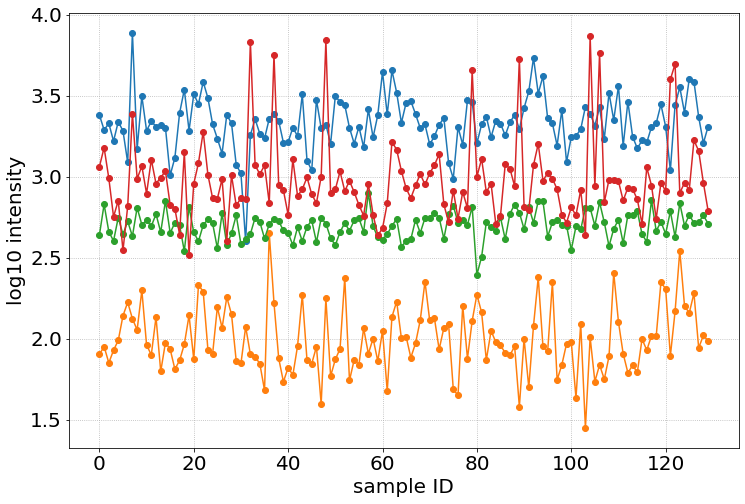

In [9]:
for met in isdf.columns:
    x = numpy.arange(len(isdf[met]))
    y = numpy.log10(isdf[met].values)
    matplotlib.pyplot.plot(x, y, 'o-')
matplotlib.pyplot.xlabel('sample ID')
matplotlib.pyplot.ylabel('log10 intensity')
matplotlib.pyplot.grid(ls=':')

(0.0, 10.0)

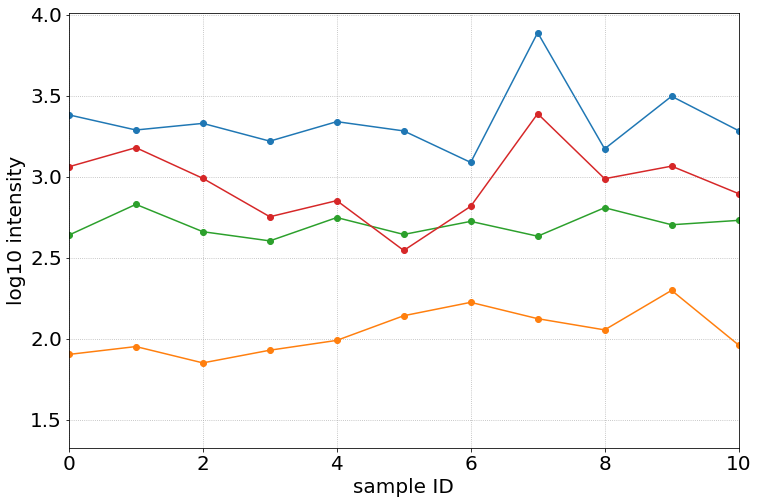

In [10]:
for met in isdf.columns:
    x = numpy.arange(len(isdf[met]))
    y = numpy.log10(isdf[met].values)
    matplotlib.pyplot.plot(x, y, 'o-')
matplotlib.pyplot.xlabel('sample ID')
matplotlib.pyplot.ylabel('log10 intensity')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.xlim([0, 10])

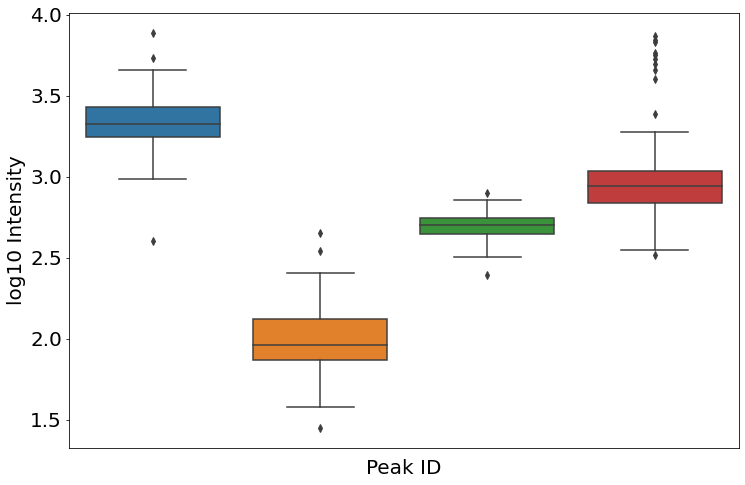

In [20]:
g = seaborn.boxplot(data=numpy.log10(isdf), palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity', xlabel='Peak ID')
matplotlib.pyplot.show()

In [12]:
def quantile_normalization(tdf):
    
    ###
    ### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
    ###

    # step 1/3: sorting sample values
    df_sorted = pandas.DataFrame(numpy.sort(tdf.values, axis=0), index=tdf.index, columns=tdf.columns)
    # step 2/3: averaging rank values across samples
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = numpy.arange(1, len(df_mean) + 1)
    # step 3/3: re-ordering samples
    df_qn = tdf.rank(method="min").stack().astype(int).map(df_mean).unstack()

    return df_qn

In [13]:
tdf = isdf.transpose()

In [14]:
qdf = quantile_normalization(tdf)

In [15]:
qisdf = qdf.transpose()
qisdf

,X121.04165,X166.08246,X185.07420999999999,X361.07267999999999
0,2534.135147,110.311996,502.035972,988.66832
1,2534.135147,110.311996,502.035972,988.66832
2,2534.135147,110.311996,502.035972,988.66832
3,2534.135147,110.311996,502.035972,988.66832
4,2534.135147,110.311996,502.035972,988.66832
...,...,...,...,...
125,2534.135147,110.311996,502.035972,988.66832
126,2534.135147,110.311996,502.035972,988.66832
127,2534.135147,110.311996,502.035972,988.66832
128,2534.135147,110.311996,502.035972,988.66832


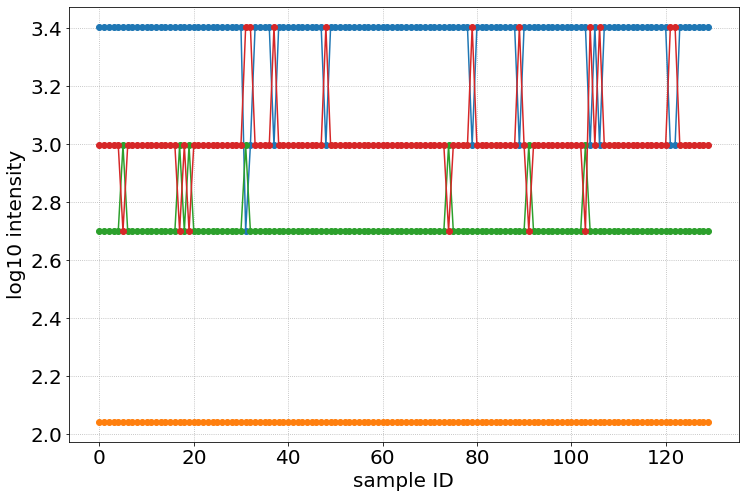

In [16]:
for met in qisdf.columns:
    x = numpy.arange(len(qisdf[met]))
    y = numpy.log10(qisdf[met].values)
    matplotlib.pyplot.plot(x, y, 'o-')
matplotlib.pyplot.xlabel('sample ID')
matplotlib.pyplot.ylabel('log10 intensity')
matplotlib.pyplot.grid(ls=':')

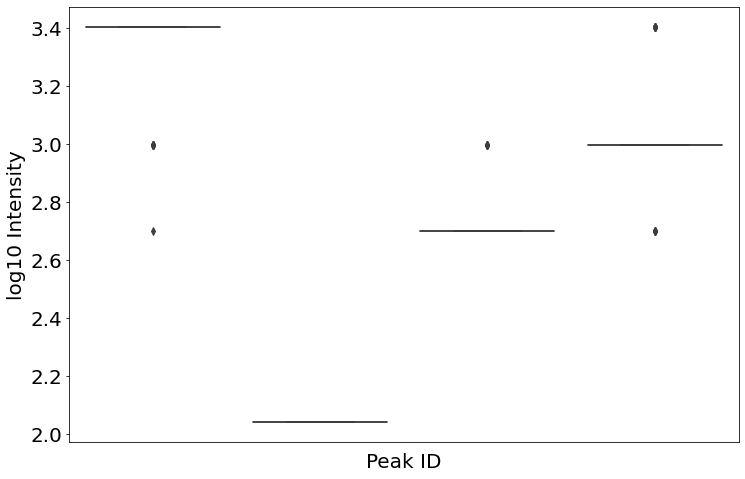

In [21]:
g = seaborn.boxplot(data=numpy.log10(qisdf), palette='tab10')
g.set(xticklabels=[])
g.tick_params(bottom=False)
g.set(ylabel='log10 Intensity', xlabel='Peak ID')
matplotlib.pyplot.show()